In [1]:
import numpy as np 
import pandas as pd 

In [2]:
url_data="/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv"

In [3]:
df=pd.read_csv(url_data)
df.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
63,64,Xiaomi Mi 11,Android,545,11.5,2911,87,1717,21,Female,5
472,473,Xiaomi Mi 11,Android,139,3.0,697,37,513,26,Female,2
37,38,Samsung Galaxy S21,Android,522,11.2,2808,93,2328,24,Male,5
603,604,OnePlus 9,Android,138,2.1,660,22,424,41,Female,2
176,177,Xiaomi Mi 11,Android,255,5.4,1738,42,826,21,Male,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [5]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [6]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [7]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [8]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [9]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [10]:
df['Operating System'].unique() 

array(['Android', 'iOS'], dtype=object)

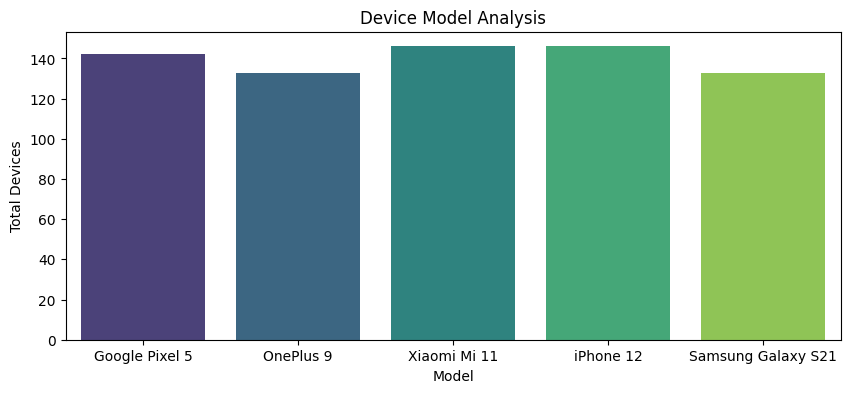

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Device Model', palette='viridis')
plt.title("Device Model Analysis")
plt.ylabel("Total Devices")
plt.xlabel("Model")
plt.show()

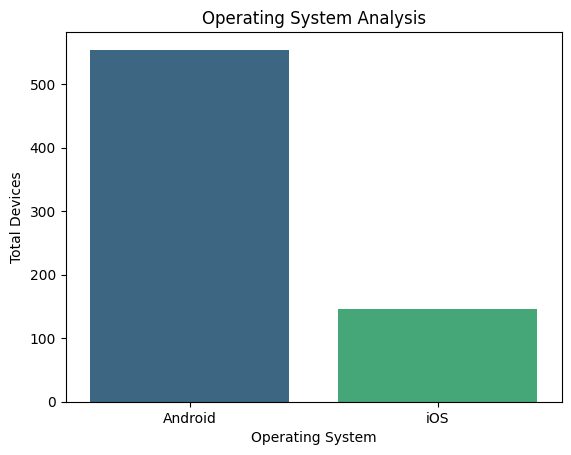

In [12]:
sns.countplot(data=df, x='Operating System', palette='viridis')
plt.title("Operating System Analysis")
plt.ylabel("Total Devices")
plt.xlabel("Operating System")
plt.show()

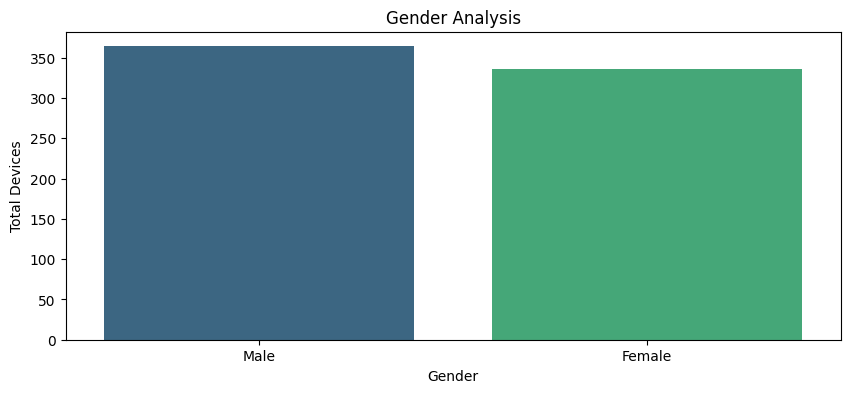

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title("Gender Analysis")
plt.ylabel("Total Devices")
plt.xlabel("Gender")
plt.show()

In [14]:
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Operating System'] = encoder.fit_transform(df['Operating System']) 
df['Device Model'] = encoder.fit_transform(df['Device Model'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [16]:
X = df.drop(columns=['User Behavior Class'], axis=1)
y = df['User Behavior Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [20]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance of each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance of each component: [0.48052845 0.17057553 0.10470698 0.10227962 0.09240813 0.02914648]
Total explained variance: 0.9796452001049184


In [21]:
clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

Accuracy: 100%


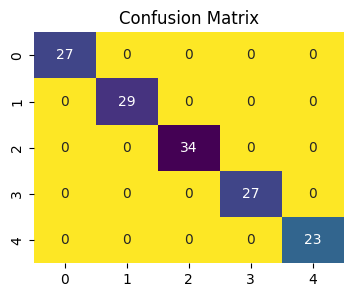



Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [22]:
print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100)}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='viridis_r', cbar=False)
plt.title("Confusion Matrix")
plt.show()


print("\n\nClassification Report:")
print(classification_report(y_test, y_pred))